# Practice Cleaning/EDA - Car Dataset 
Pandas is the primary library that we will use for pre-processing and exploring out data! Get familiar with it. Learn it. Love it. It's your life now. 
[Pandas Documentation](https://pandas.pydata.org/docs/user_guide/index.html)

## Load Libraries 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [2]:
#check out the matplotlib 'styles'
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

## Load the Data 
- Get and research the data
- Load into notebook with Pandas
- View basic info and summary stats

In [3]:
#import data 
df = pd.read_csv("data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
#view information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


## Scrub the Data
* Do we have missing values? 
* Do we need to change any of our dtypes? 
* How about the column names? 
    - NO SPACES
    - NO SPECIAL CHARACTERS 
* Should we drop any columns? 
* Are there duplicates? Missing or Null values? 
* Check for outliers. 

In [5]:
#rename columns 
df.columns = df.columns.str.replace(" ", "_")
#df = df.rename(columns={'Engine Fuel Type': 'fuel_type', 'Engine HP': 'EHP',
                       #'Engine Cylinders': 'cylinders'})


In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [7]:
#checking for duplicates and drop if any
dup_rows_df = df[df.duplicated()]
print(dup_rows_df.shape)

(715, 16)


In [8]:
df.shape

(11914, 16)

In [9]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
make                 11199 non-null object
model                11199 non-null object
year                 11199 non-null int64
engine_fuel_type     11196 non-null object
engine_hp            11130 non-null float64
engine_cylinders     11169 non-null float64
transmission_type    11199 non-null object
driven_wheels        11199 non-null object
number_of_doors      11193 non-null float64
market_category      7823 non-null object
vehicle_size         11199 non-null object
vehicle_style        11199 non-null object
highway_mpg          11199 non-null int64
city_mpg             11199 non-null int64
popularity           11199 non-null int64
msrp                 11199 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [10]:
#are there any missing rows? Deal with them. 
#solutions: Replace with median/mode/mean
print(df.isnull().sum())

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3376
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64


In [11]:
df = df.dropna()
print(df.isnull().sum())

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64


## Exploratory Data Analysis 
- summarize main characteristics of the data
- gain better understanding of the data-set,
- uncover relationships between different variables, and
- extract important variables for the problem we are trying to solve

#### Helpful methods include:
- unique()
- value_counts()

In [12]:
#view descriptive stats
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,7735.00000,7735.000000,7735.000000,7735.000000,7735.00000,7735.000000,7735.000000,7.735000e+03
mean,2012.14958,277.632062,5.825469,3.421332,26.52980,19.468649,1513.098772,5.102826e+04
std,6.23167,115.529955,1.895593,0.895054,7.78492,7.231534,1429.197317,7.153777e+04
min,1990.00000,55.000000,0.000000,2.000000,12.00000,7.000000,2.000000,2.000000e+03
25%,2010.00000,194.000000,4.000000,2.000000,22.00000,16.000000,520.000000,2.622500e+04
50%,2015.00000,270.000000,6.000000,4.000000,26.00000,18.000000,1013.000000,3.560000e+04
75%,2016.00000,325.000000,6.000000,4.000000,30.00000,22.000000,2009.000000,4.947750e+04
max,2017.00000,1001.000000,16.000000,4.000000,354.00000,137.000000,5657.000000,2.065902e+06


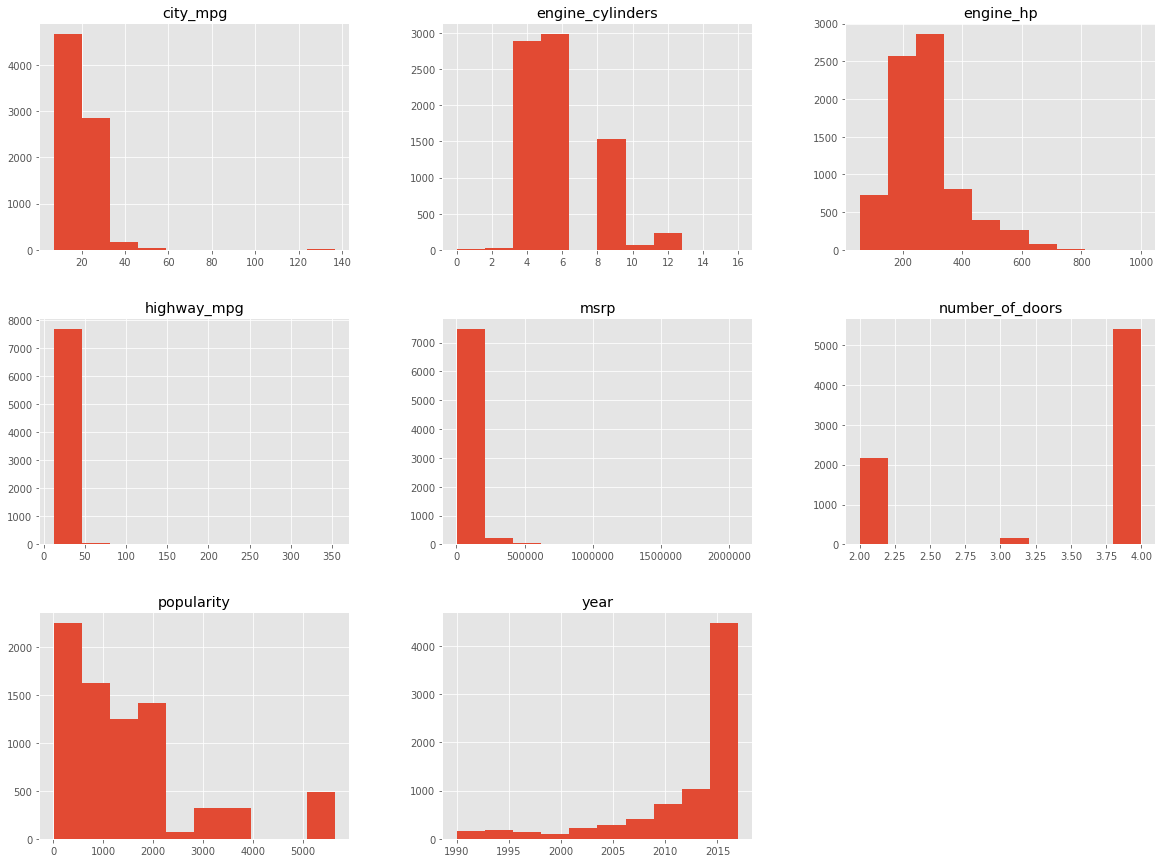

In [13]:
#view histograms of every column 
df.hist(figsize=(20,15));

## Groupby
The “groupby” method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.


In [14]:
#What type of driven wheel is most valuable? 
df_group_drive = df.groupby(['driven_wheels'])['msrp'].mean()
df_group_drive

driven_wheels
all wheel drive      61444.405393
four wheel drive     48740.482704
front wheel drive    25924.110476
rear wheel drive     70237.459322
Name: msrp, dtype: float64

In [18]:
df_group_drive = df.groupby(['driven_wheels', 'vehicle_style']).mean()
df_group_drive

year   engine_hp  \
driven_wheels     vehicle_style                                  
all wheel drive   2dr Hatchback        1996.600000  236.300000   
                  2dr SUV              2008.272727  230.181818   
                  4dr Hatchback        2014.450000  226.600000   
                  4dr SUV              2014.503688  256.727081   
                  Cargo Van            2014.000000  310.000000   
                  Convertible          2014.790476  448.800000   
                  Convertible SUV      2014.600000  255.000000   
                  Coupe                2013.809278  428.829897   
                  Crew Cab Pickup      2007.814815  267.370370   
                  Passenger Van        2014.000000  310.000000   
                  Regular Cab Pickup   1991.000000  280.000000   
                  Sedan                2014.089127  322.500891   
                  Wagon                2011.435374  253.115646   
four wheel drive  2dr Hatchback        1992.500000  104.500000   
                  2dr SUV              1995.333333  182.000000   
                  4dr Hatchback        1993.500000  104.500000   
                  4dr SUV              2013.337884  339.576792   
                  Convertible SUV      1997.000000  182.000000   
                  Crew Cab Pickup      2013.409938  316.074534   
                  Extended Cab Pickup  2012.978261  308.641304   
                  Regular Cab Pickup   2013.077922  281.558442   
                  Sedan                2002.000000  250.000000   
front wheel drive 2dr Hatchback        2006.601064  151.917553   
                  4dr Hatchback        2012.670476  150.916190   
                  4dr SUV              2014.650407  223.190244   
                  Cargo Minivan        2007.000000  207.500000   
                  Convertible          2009.439560  191.274725   
                  Coupe                2004.921348  225.460674   
                  Passenger Minivan    2010.666667  249.650000   
                  Sedan                2011.499293  224.605375   
                  Wagon                2011.145570  203.075949   
rear wheel drive  2dr Hatchback        1999.571429  261.380952   
                  4dr Hatchback        2016.000000  253.125000   
                  4dr SUV              2013.602041  329.897959   
                  Cargo Minivan        2016.000000  208.000000   
                  Cargo Van            2013.812500  251.250000   
                  Convertible          2011.142539  354.951002   
                  Coupe                2011.183099  386.258216   
                  Crew Cab Pickup      2013.267123  307.684932   
                  Extended Cab Pickup  2010.905263  265.410526   
                  Passenger Minivan    2016.000000  208.000000   
                  Passenger Van        2015.163265  274.540816   
                  Regular Cab Pickup   2010.132653  244.918367   
                  Sedan                2010.253759  336.971805   
                  Wagon                2001.113636  242.022727   

                                       engine_cylinders  number_of_doors  \
driven_wheels     vehicle_style                                            
all wheel drive   2dr Hatchback                5.200000         2.000000   
                  2dr SUV                      4.909091         2.000000   
                  4dr Hatchback                4.580000         4.000000   
                  4dr SUV                      5.264489         4.000000   
                  Cargo Van                    8.000000         3.000000   
                  Convertible                  7.809524         2.000000   
                  Convertible SUV              5.200000         2.000000   
                  Coupe                        7.309278         2.000000   
                  Crew Cab Pickup              5.629630         4.000000   
                  Passenger Van                8.000000         3.000000   
                  Regular Cab P

In [ ]:
#what type of driven wheel is most valuable based on body style? 

A table of this form isn’t the easiest to read, and also not very easy to visualize. To make it easier to understand, we can transform this table to a pivot table by using the pivot.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7735 entries, 0 to 11913
Data columns (total 16 columns):
make                 7735 non-null object
model                7735 non-null object
year                 7735 non-null int64
engine_fuel_type     7735 non-null object
engine_hp            7735 non-null float64
engine_cylinders     7735 non-null float64
transmission_type    7735 non-null object
driven_wheels        7735 non-null object
number_of_doors      7735 non-null float64
market_category      7735 non-null object
vehicle_size         7735 non-null object
vehicle_style        7735 non-null object
highway_mpg          7735 non-null int64
city_mpg             7735 non-null int64
popularity           7735 non-null int64
msrp                 7735 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.0+ MB


In [23]:
#use pivot to transform the table 
df_pivot = df.pivot(columns='driven_wheels')
df_pivot

make                                     \
driven_wheels all wheel drive four wheel drive front wheel drive   
0                         NaN              NaN               NaN   
1                         NaN              NaN               NaN   
2                         NaN              NaN               NaN   
3                         NaN              NaN               NaN   
4                         NaN              NaN               NaN   
5                         NaN              NaN               NaN   
6                         NaN              NaN               NaN   
7                         NaN              NaN               NaN   
8                         NaN              NaN               NaN   
9                         NaN              NaN               NaN   
10                        NaN              NaN               NaN   
11                        NaN              NaN               NaN   
12                        NaN              NaN               NaN   
13                        NaN              NaN               NaN   
15                        NaN              NaN               NaN   
16                        NaN              NaN               NaN   
17                        NaN              NaN              Audi   
19                       Audi              NaN               NaN   
21                       Audi              NaN               NaN   
22                        NaN              NaN              Audi   
23                       Audi              NaN               NaN   
26                       Audi              NaN               NaN   
27                        NaN              NaN              Audi   
28                       Audi              NaN               NaN   
29                        NaN              NaN              Audi   
30                        NaN              NaN              Audi   
31                       Audi              NaN               NaN   
32                        NaN              NaN               NaN   
33                        NaN              NaN               NaN   
34                        NaN              NaN               NaN   
...                       ...              ...               ...   
11884                     NaN              NaN               NaN   
11885                     NaN              NaN               NaN   
11886                     NaN              NaN               NaN   
11887                     NaN              NaN               NaN   
11888                     NaN              NaN               NaN   
11889                     NaN              NaN               NaN   
11890                     NaN              NaN               NaN   
11891                     NaN              NaN               NaN   
11892                     NaN              NaN               NaN   
11893                     NaN              NaN               NaN   
11894                     NaN              NaN               NaN   
11895                     NaN              NaN               NaN   
11896                     NaN              NaN               NaN   
11897                     NaN              NaN               NaN   
11898                     NaN              NaN               NaN   
11899                     NaN              NaN               NaN   
11900                     NaN              NaN               NaN   
11901                     NaN              NaN               NaN   
11902                     NaN              NaN               NaN   
11903                     NaN              NaN               NaN   
11904                     NaN              NaN               NaN   
11905                     NaN              NaN               NaN   
11906                   Acura              NaN               NaN   
11907                   Acura              NaN               NaN   
11908                   Acura              NaN               NaN   
11909                   Acura              NaN               NaN   
11910        

In [24]:
#fill in missing values 
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Visualizations always help EDA 

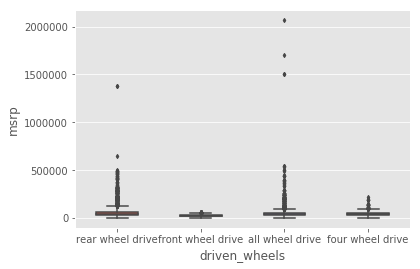

In [34]:
#Visual 1 
sns.boxplot(x='driven_wheels', y='msrp', data=df, width=0.5, fliersize=3)

ValueError: `bins` must increase monotonically, when an array

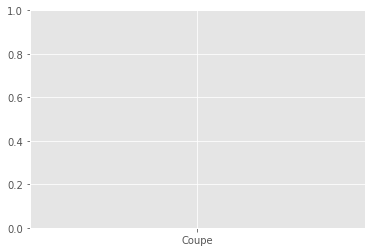

In [47]:
#Visual 2 
plt.hist(df['vehicle_style'], df['msrp'])
plt.ylabel('price')
plt.xlabel('Horsepower ')
plt.show()

Text(0.5, 0, 'Style')

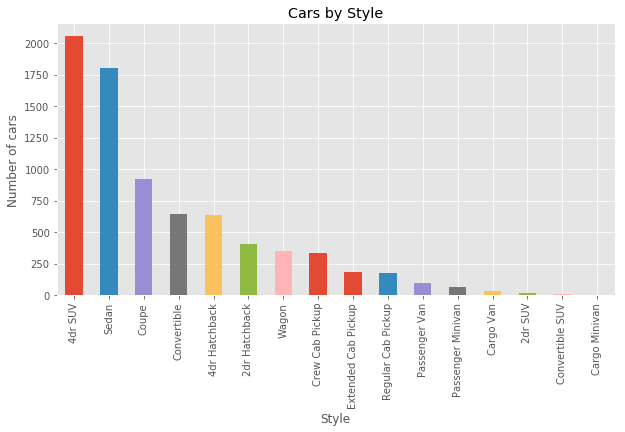

In [49]:
#visual 3
df['vehicle_style'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Cars by Style')
plt.ylabel('Number of cars')
plt.xlabel('Style')

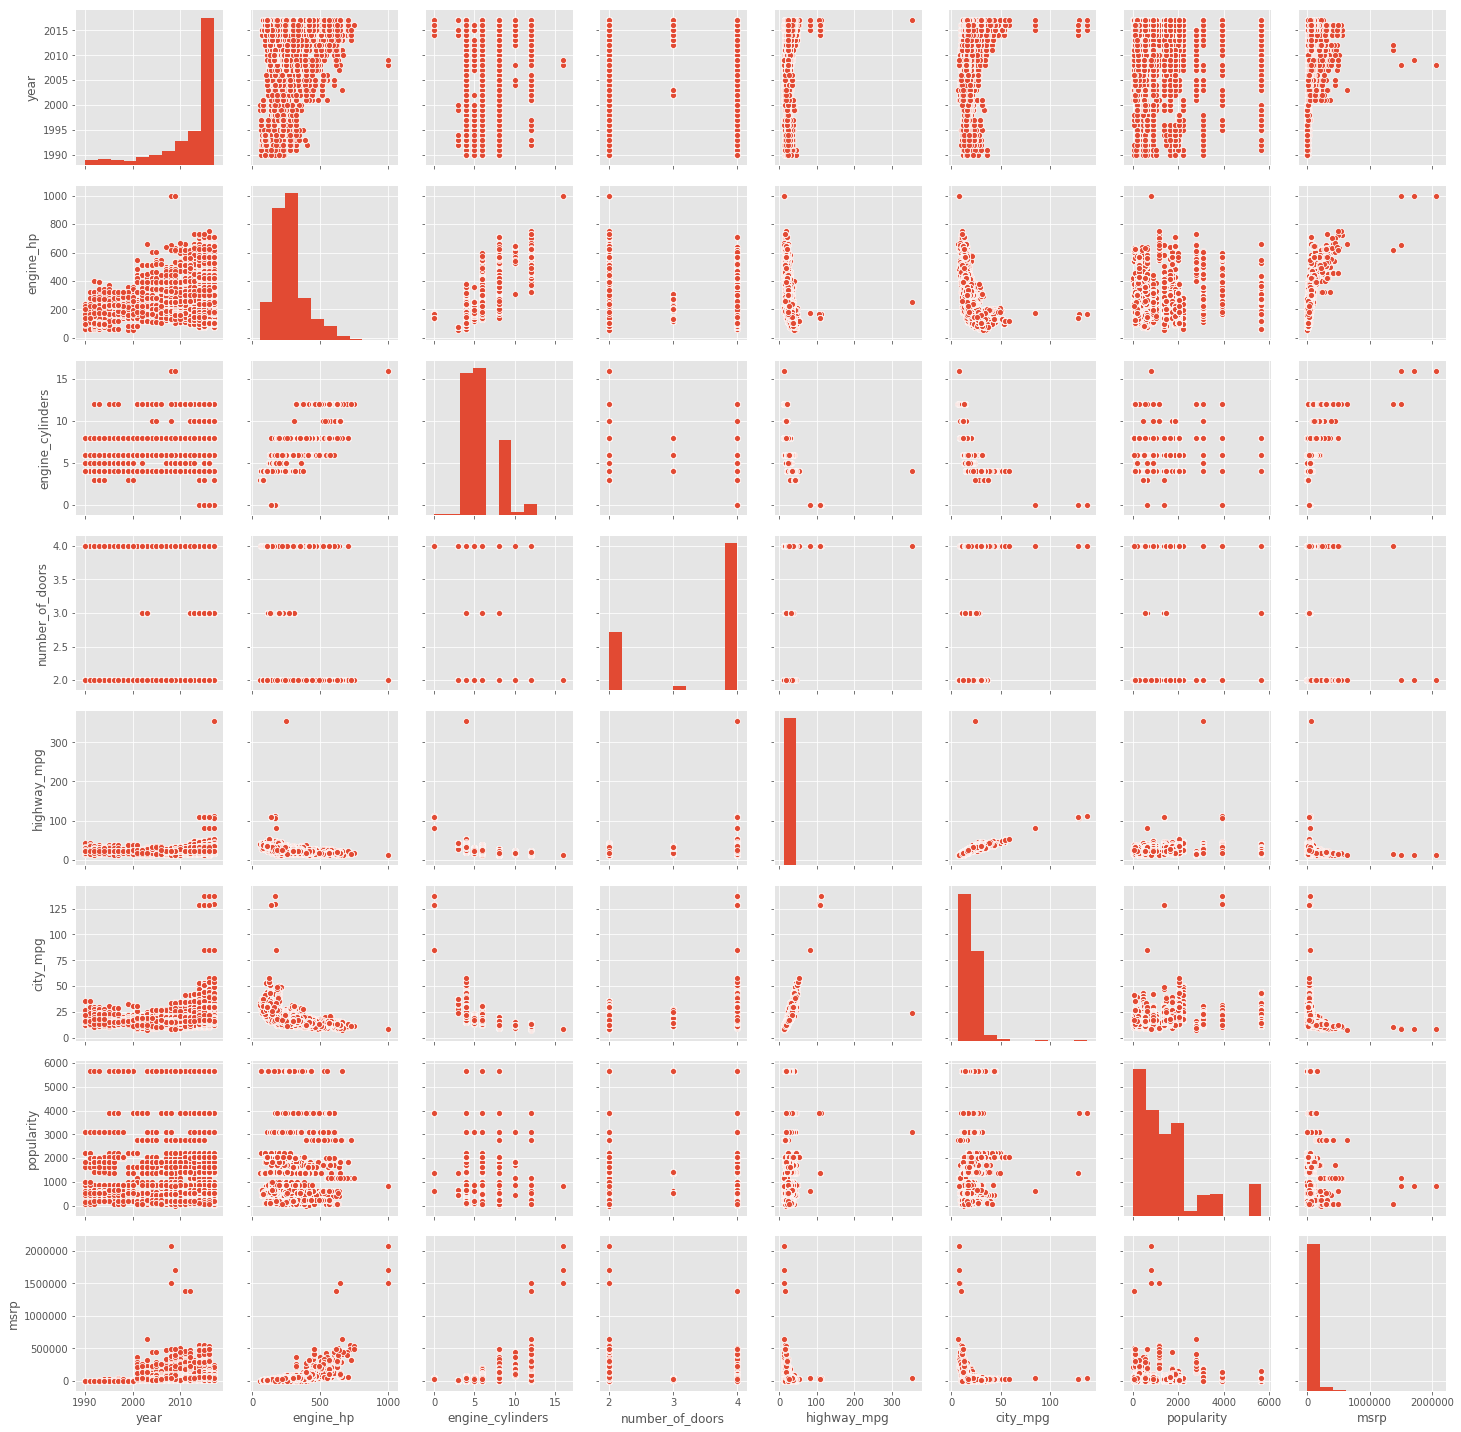

In [50]:
sns.pairplot(df);